In [20]:
import pandas as pd
import numpy as np

In [7]:
#파일 읽어오기
#샘플 데이터 활용
sales=pd.read_csv("../../data/sales/2020_sales_sample.csv",encoding='ms949')

## EDA 데이터탐색

In [4]:
sales.shape

(95204, 3)

In [5]:
sales.describe()

,주문자 연령,주문품목 수량
count,70345.000000,95204.000000
mean,40.176502,1.069230
std,23.960874,0.486239
min,-78.000000,1.000000
25%,30.000000,1.000000
50%,37.000000,1.000000
75%,43.000000,1.000000
max,121.000000,50.000000


In [6]:
sales.head()

,주문자 연령,대분류,주문품목 수량
0,NaN,상품A,1
1,41.0,상품B,1
2,41.0,상품B,1
3,41.0,상품B,1
4,41.0,상품B,1


1) 주문자 연령과 주문품목 수량이 다른 것으로 보아, 연령 확인이 불가한 고객 데이터가 있음

2) 주문자 연령의 최소값이 -78, 최대값이 121로 부정확한 입력값이 있음 

## DataCleansing

In [39]:
def CleanAge(age):
    # 나이가 0살보다 어리거나, 100살보다 많으면 잘못 입력한 데이터로 간주하고 확인불가로 처리
    # 10으로 나누어 나이 뒷자리 버리고, 10대~90대로 분류 (10살 미만일 경우, 0대로 노출됨 만약 있을경우 처리 필요)
    if ( age > 0 ) and ( age < 100 ):
        return str(int((age // 10) * 10))+"대"
    else:
        return "확인불가"
#NaN 데이터의 경우, 나누기가 불가하므로 제외하고 처리
sales.loc[~sales['주문자 연령'].isnull(),'연령대']=sales.loc[~sales['주문자 연령'].isnull(),'주문자 연령'].apply(CleanAge)

In [40]:
sales[['주문자 연령','연령대']]

,주문자 연령,연령대
0,NaN,NaN
1,41.0,40대
2,41.0,40대
3,41.0,40대
4,41.0,40대
...,...,...
95199,32.0,30대
95200,17.0,10대
95201,26.0,20대
95202,26.0,20대


In [41]:
# 연령 미입력 고객의 경우, 확인불가로 통일
sales.loc[sales['주문자 연령'].isnull(),'연령대'] = '확인불가'

In [42]:
sales[['주문자 연령','연령대']]

,주문자 연령,연령대
0,NaN,확인불가
1,41.0,40대
2,41.0,40대
3,41.0,40대
4,41.0,40대
...,...,...
95199,32.0,30대
95200,17.0,10대
95201,26.0,20대
95202,26.0,20대


## 상품 카테고리 별 고객 연령대 확인

In [52]:
##시각화 도구 
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams.update({'font.size': 20})

In [61]:
## 전체적인 연령대 분포 확인 
s1 = sales['연령대'].value_counts()
s2 = sales['연령대'].value_counts(normalize=True)
pd.concat([s1,s2],axis=1,keys=['counts','%'])

,counts,%
확인불가,29514,0.310008
30대,27025,0.283864
40대,18888,0.198395
20대,13153,0.138156
50대,3678,0.038633
10대,1994,0.020944
60대,758,0.007962
70대,154,0.001618
80대,40,0.000420


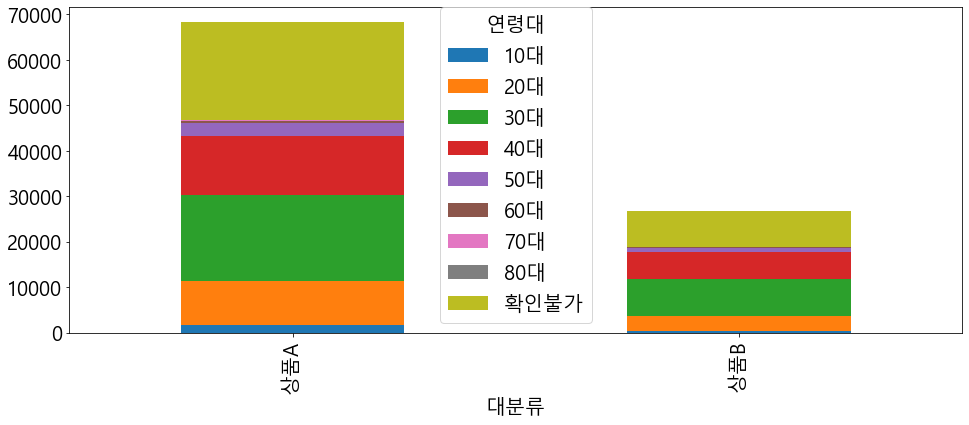

In [58]:
sales.groupby('대분류')['연령대'].value_counts().unstack(level=1).plot.bar(stacked=True,figsize=(16,6))

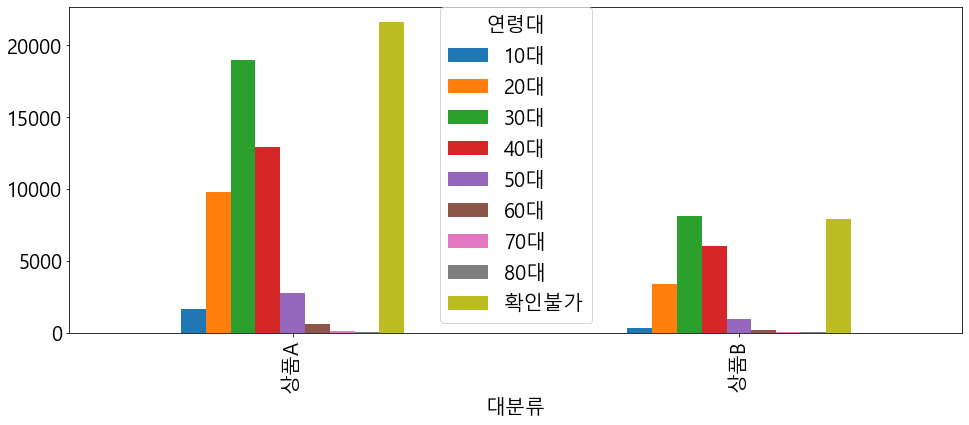

In [56]:
sales.groupby('대분류')['연령대'].value_counts().unstack(level=1).plot.bar(stacked=False,figsize=(16,6))

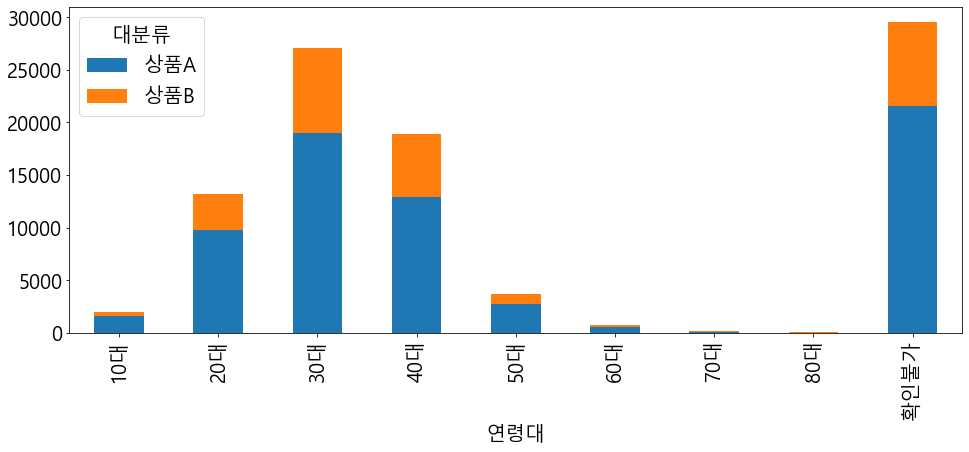

In [54]:
sales.groupby('연령대')['대분류'].value_counts().unstack(level=1).plot.bar(stacked=True,figsize=(16,6))

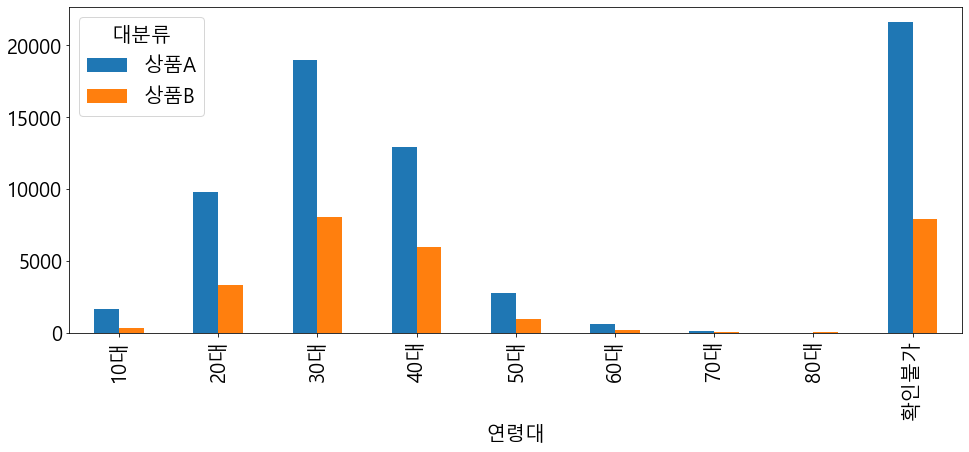

In [55]:
sales.groupby('연령대')['대분류'].value_counts().unstack(level=1).plot.bar(stacked=False,figsize=(16,6))